In [62]:
"""
main title: ##
sub-title: ###
"""

'\nmain title: ##\nsub-title: ###\n'

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_curve

import warnings
warnings.filterwarnings('ignore')

## Proprocessing

### data checking

In [64]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [65]:
# exclude id column

train = train.iloc[:, 1:]
test = test.iloc[:, 1:]

In [66]:
train

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


In [67]:
test.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
1,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
2,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
3,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
4,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0


In [68]:
# split x features and y feature

train_x = train.iloc[:, :-1]
train_y = train.ProdTaken

In [69]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1861 non-null   float64
 1   TypeofContact             1945 non-null   object 
 2   CityTier                  1955 non-null   int64  
 3   DurationOfPitch           1853 non-null   float64
 4   Occupation                1955 non-null   object 
 5   Gender                    1955 non-null   object 
 6   NumberOfPersonVisiting    1955 non-null   int64  
 7   NumberOfFollowups         1942 non-null   float64
 8   ProductPitched            1955 non-null   object 
 9   PreferredPropertyStar     1945 non-null   float64
 10  MaritalStatus             1955 non-null   object 
 11  NumberOfTrips             1898 non-null   float64
 12  Passport                  1955 non-null   int64  
 13  PitchSatisfactionScore    1955 non-null   int64  
 14  OwnCar  

In [70]:
str_cols = train_x.select_dtypes(include='object').columns
num_cols = train_x.select_dtypes(include='number').columns

In [71]:
train_x.describe()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,1861.000000,1955.000000,1853.000000,1955.000000,1942.000000,1945.000000,1898.000000,1955.000000,1955.000000,1955.000000,1928.000000,1855.000000
mean,37.462117,1.641432,15.524015,2.922762,3.718332,3.568638,3.255532,0.291049,3.067519,0.619437,1.213174,23624.108895
std,9.189948,0.908744,8.150057,0.712276,1.004095,0.793196,1.814698,0.454362,1.372915,0.485649,0.859450,5640.482258
min,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20390.000000
50%,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22295.000000
75%,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25558.000000
max,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,19.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


#### check object columns

In [72]:
for col in str_cols:
    print(f'----- {col} -----\n{train_x[col].value_counts()}\n')

----- TypeofContact -----
Self Enquiry       1379
Company Invited     566
Name: TypeofContact, dtype: int64

----- Occupation -----
Salaried          965
Small Business    826
Large Business    163
Free Lancer         1
Name: Occupation, dtype: int64

----- Gender -----
Male       1207
Female      692
Fe Male      56
Name: Gender, dtype: int64

----- ProductPitched -----
Basic           745
Deluxe          689
Standard        302
Super Deluxe    130
King             89
Name: ProductPitched, dtype: int64

----- MaritalStatus -----
Married      949
Divorced     375
Single       349
Unmarried    282
Name: MaritalStatus, dtype: int64

----- Designation -----
Executive         745
Manager           689
Senior Manager    302
AVP               130
VP                 89
Name: Designation, dtype: int64



#### check null values

In [73]:
train_x.isnull().sum()

Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
dtype: int64

how to handle null data
- null data <= 60: replace with mean
- null data > 60: use regression to predict null

In [74]:
# null - Number of followups

print(train_x['NumberOfFollowups'].mean())
print(train_x['NumberOfChildrenVisiting'].mean())
print(train_x['NumberOfTrips'].mean())
print(train_x['PreferredPropertyStar'].mean())

3.718331616889804
1.213174273858921
3.255532139093783
3.568637532133676


In [75]:
train_x['TypeofContact'] = train_x['TypeofContact'].fillna('Self Enquiry')
train_x['NumberOfFollowups'] = train_x['NumberOfFollowups'].fillna(4.0)
train_x['NumberOfChildrenVisiting'] = train_x['NumberOfChildrenVisiting'].fillna(1.0)
train_x['NumberOfTrips'] = train_x['NumberOfTrips'].fillna(3.0)
train_x['PreferredPropertyStar'] = train_x['PreferredPropertyStar'].fillna(4.0)
train_x.isnull().sum()

Age                          94
TypeofContact                 0
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome               100
dtype: int64

## EDA

### object columns

In [76]:
train

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


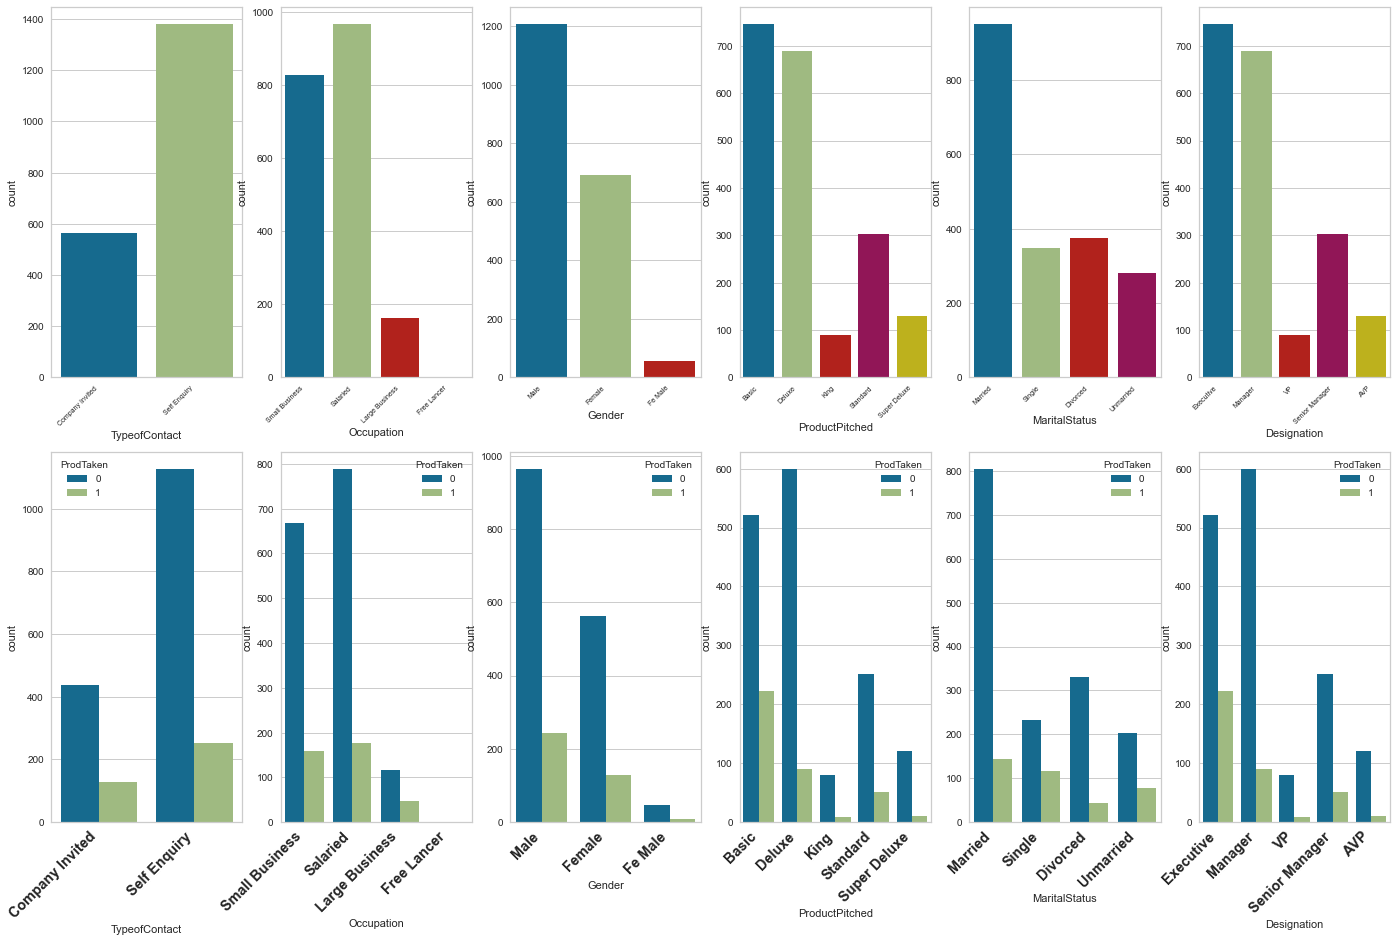

In [77]:
fig, ax = plt.subplots(2, 6, figsize=(24, 15))

for i, col in enumerate(str_cols):
    g = sns.countplot(train[col], ax=ax[0][i])
    g.set_xticklabels(g.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small')
    plt.xlabel(col)
    
for i, col in enumerate(str_cols):
    g = sns.countplot(train[col], hue=train['ProdTaken'], ax=ax[1][i])
    g.set_xticklabels(g.get_xticklabels(),
                      rotation=45,
                      horizontalalignment='right',
                      fontweight='heavy',
                      fontsize='x-large')
    plt.xlabel(col)
    
plt.show()
plt.close()

there are outliers in MonthlyIncome

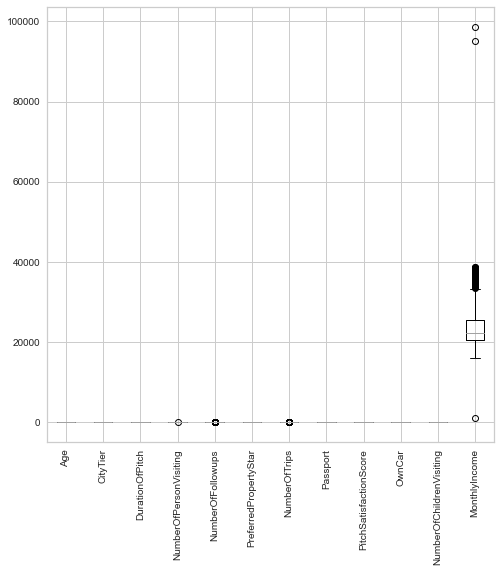

In [78]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
train_x.boxplot(ax=ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

there are outliers in NumberOfTrips

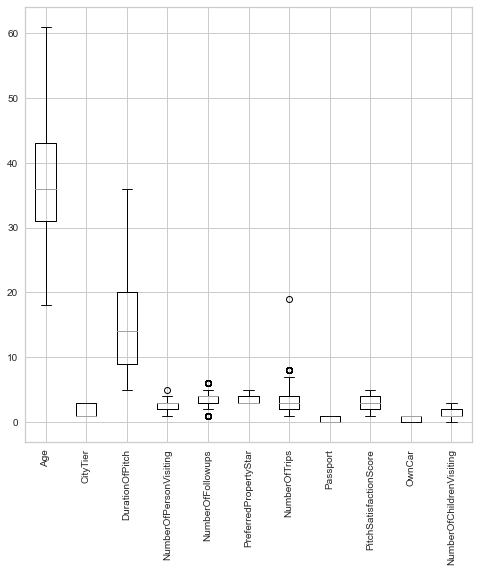

In [79]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
train_x.drop(['MonthlyIncome'], axis=1).boxplot(ax=ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

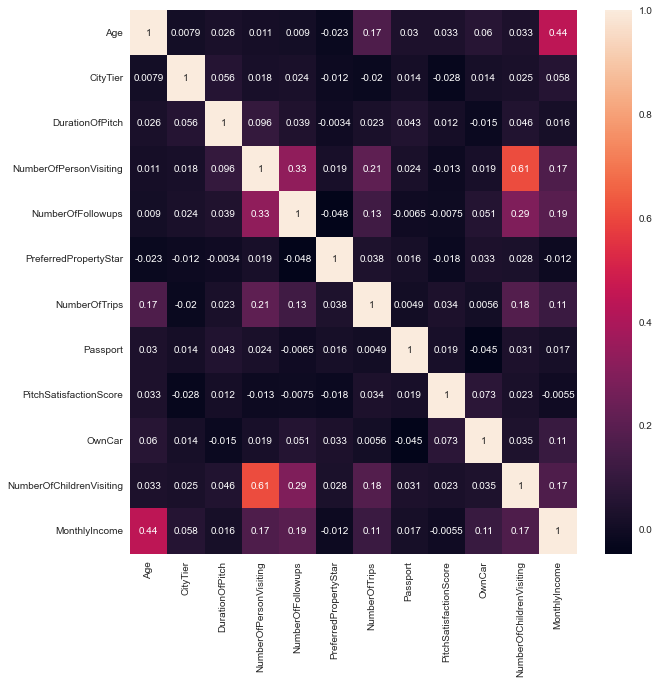

In [80]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(train_x.corr(), annot=True)
plt.show()
plt.close()

### handle outliers

In [81]:
def z_score_outlier(df, col:str):
    z_score_df = pd.DataFrame({'raw_data':df[col], 'z_score':np.abs(ss.zscore(df[col]))})
    return z_score_df

In [82]:
outlier_children_visiting = z_score_outlier(train_x, 'NumberOfChildrenVisiting')
outlier_followups = z_score_outlier(train_x, 'NumberOfFollowups')
outlier_trips = z_score_outlier(train_x, 'NumberOfTrips')


In [83]:
print(len(outlier_followups[outlier_followups['z_score']>2]))
temp = outlier_followups[outlier_followups['z_score']<2]
print(temp['raw_data'].median())
print(temp['raw_data'].mean())
outlier_followups[outlier_followups['z_score']>2]['raw_data'].unique()

121
4.0
3.771537622682661


array([1., 6.])

In [84]:
outlier_followups = outlier_followups.replace({'raw_data':1.0}, 4.0)
outlier_followups = outlier_followups.replace({'raw_data':6.0}, 4.0)
outlier_followups[outlier_followups['raw_data']==6.0]

,raw_data,z_score


In [85]:
print(outlier_trips[outlier_trips['z_score']>2]['raw_data'].max())
outlier_trips[outlier_trips['z_score']>2]['raw_data']

19.0


7       7.0
11      7.0
44      7.0
49      7.0
83      7.0
       ... 
1930    7.0
1933    8.0
1936    7.0
1937    7.0
1952    7.0
Name: raw_data, Length: 132, dtype: float64

In [86]:
train_x = train_x.replace({'NumberOfFollowups':1.0}, 4.0)
train_x = train_x.replace({'NumberOfFollowups':6.0}, 4.0)
train_x = train_x.replace({'NumberOfTrips':19.0}, 8.0)

outliers are handled!!

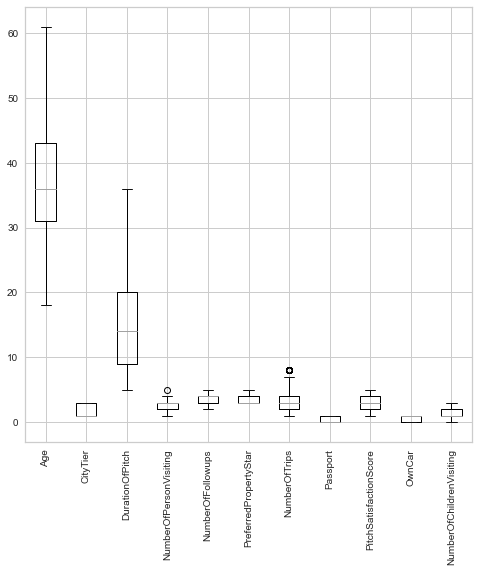

In [87]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
train_x.drop(['MonthlyIncome'], axis=1).boxplot(ax=ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

## handle missing values using linear regression

In [88]:
def handle_null_lr(df_with_null, to_be_dropped:list, target:str):
    lr = LinearRegression()
    
    df_without_object = df_with_null.select_dtypes(exclude='object')
    temp_df = df_without_object.drop(columns=to_be_dropped)
    df_train = temp_df.dropna()
    df_pred = temp_df.drop(columns=[target])
    
    x = df_train.drop(columns=[target])
    y = df_train[target]
    
    lr.fit(x, y)
    target_pred = lr.predict(df_pred)
    
    return np.round(target_pred, 0)

In [89]:
age_pred = handle_null_lr(train_x, ['DurationOfPitch', 'MonthlyIncome'], 'Age')
pitch_pred = handle_null_lr(train_x, ['Age', 'MonthlyIncome'], 'DurationOfPitch')
income_pred = handle_null_lr(train_x, ['Age', 'DurationOfPitch'], 'MonthlyIncome')

In [90]:
print(f'{age_pred}\n')
print(f'{pitch_pred}\n')
print(f'{income_pred}\n')

[36. 37. 37. ... 42. 38. 35.]

[15. 16. 14. ... 16. 16. 15.]

[22833. 22955. 21509. ... 26049. 26065. 21405.]



In [91]:
print(len(age_pred))
print(len(pitch_pred))
print(len(income_pred))

1955
1955
1955


In [92]:
train_x['Age'].fillna(pd.Series(age_pred.flatten()), inplace=True)
train_x['DurationOfPitch'].fillna(pd.Series(pitch_pred.flatten()), inplace=True)
train_x['MonthlyIncome'].fillna(pd.Series(income_pred.flatten()), inplace=True)

In [93]:
train_x.isnull().sum()

Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

## data handling

### scaling for numeric cols

In [94]:
num_cols, str_cols

(Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
        'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
        'Passport', 'PitchSatisfactionScore', 'OwnCar',
        'NumberOfChildrenVisiting', 'MonthlyIncome'],
       dtype='object'),
 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation'],
       dtype='object'))

In [98]:
scaler = StandardScaler()
scaler.fit(train_x[num_cols]) # scaler에 데이터 학습
scaled = scaler.transform(train_x[num_cols])
raw_x = train_x
train_x[num_cols] = scaled
train_x.isnull().sum()

Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### encoding for object cols

In [96]:
train_x['TypeofContact'].unique()

array(['Company Invited', 'Self Enquiry'], dtype=object)

In [99]:
encoder = LabelEncoder()

for col in str_cols:
    encoder.fit(train_x[col])
    train_x[col] = encoder.transform(train_x[col])
    
    for label in train_x[col].unique():
        if label not in encoder.classes_:
            encoder.classes_ = np.append(encoder.classes_, label)
    
    # train_x[col] = encoder.transform(train_x[col])

In [102]:
train_x

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,-1.049973,0,-0.706025,-0.692711,3,2,0.108466,0.277376,0,-0.721164,1,-0.138110,-0.640729,-1.506319,-1.275809,-0.246276,1,-0.577562
1,-0.381306,1,1.495377,0.063360,3,1,-1.295843,0.277376,1,0.542165,2,-1.277368,1.560722,1.407935,0.783816,-1.417737,2,-0.720163
2,0.844585,0,-0.706025,-0.188663,2,2,-1.295843,-1.016823,1,0.542165,1,-0.707739,-0.640729,0.679371,0.783816,-1.417737,2,-0.373197
3,-0.938529,0,-0.706025,-1.070746,3,2,0.108466,1.571574,0,0.542165,1,-0.138110,-0.640729,0.679371,-1.275809,-0.246276,1,-0.415887
4,0.510251,1,1.495377,-1.196758,2,2,-1.295843,-1.016823,1,-0.721164,0,-0.707739,-0.640729,-0.049192,0.783816,-1.417737,2,-0.664212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,-1.049973,1,-0.706025,-0.692711,3,2,0.108466,1.571574,0,-0.721164,2,-0.707739,-0.640729,-1.506319,0.783816,0.925184,1,-0.515980
1951,0.398806,1,1.495377,-0.944734,2,1,0.108466,-1.016823,4,1.805494,0,-1.277368,-0.640729,1.407935,0.783816,-0.246276,0,1.458998
1952,0.064473,0,1.495377,1.575502,3,1,0.108466,0.277376,0,-0.721164,0,2.140407,-0.640729,-0.777755,0.783816,0.925184,1,-0.347402
1953,-1.049973,1,1.495377,1.827526,3,1,0.108466,1.571574,1,-0.721164,1,-0.138110,-0.640729,-1.506319,0.783816,0.925184,2,-0.244402


## prepare for training

In [103]:
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=42, stratify=train_y)

In [130]:
# extra-tree classifier

et_clf = ExtraTreesClassifier(n_estimators=500, random_state=42)
et_clf.fit(x_train, y_train)
y_pred = et_clf.predict(x_val)

In [132]:
confusion_matrix(y_val, y_pred)
f1_score(y_val, y_pred)
# accuracy_score(y_val, y_pred)

0.6271186440677966

In [155]:
# random forest classifier

rf_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_val)

In [156]:
f1_score(y_val, y_pred)
# accuracy_score(y_val, y_pred)

0.576271186440678

In [157]:
# ensemble

voting = VotingClassifier(estimators=[('Random Forest', rf_clf), ('Extra Tress Classifier', et_clf)],
                          voting='soft')
voting.fit(x_train, y_train)
y_pred = voting.predict(x_val)

In [158]:
f1_score(y_val, y_pred)

0.6260869565217391